# TSF Model Demo Daily

This scripts provides a template to build a time series model using the SARIMA algorithm. It uses demo data for the temperature where the data observation frequency is daily.

In [1]:
# Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statsmodels as sm

from tsf.SARIMA_tsf import SARIMA_tsf

## Data Prep

Note - this will be unique to each different dataset

In [3]:
# Load Data

file = "../data/daily_temp.csv"
df = pd.read_csv(file, sep=',', header=0)

In [4]:
df.head()

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
0,01/01/1981,20.7
1,02/01/1981,17.9
2,03/01/1981,18.8
3,04/01/1981,14.6
4,05/01/1981,15.8


In [5]:
# Replace any NaN values with 0, don't select the last 2 rows (incorrect data), convert the date and convert
# the temperature
df.columns = ['date', 'temp']
df = df[:-2:]
df['date'] = pd.to_datetime(df['date'])
df['temp'] = df['temp'].astype(float)
df.head()

,date,temp
0,1981-01-01,20.7
1,1981-02-01,17.9
2,1981-03-01,18.8
3,1981-04-01,14.6
4,1981-05-01,15.8


In [6]:
# Set the index, set the frequency of the data ('D' for daily) and fill in any missing values
df = df.set_index('date',drop=True)
df = df.sort_index(ascending=True)
df = df.asfreq('D')
df = df.fillna(0)

In [11]:
# Select only the last 3 years of data as there is a lot of data
df_3years = df.tail(1095)
df_3years.head()

,temp
date,
1988-01-02,14.1
1988-01-03,12.4
1988-01-04,16.5
1988-01-05,15.2
1988-01-06,10.0


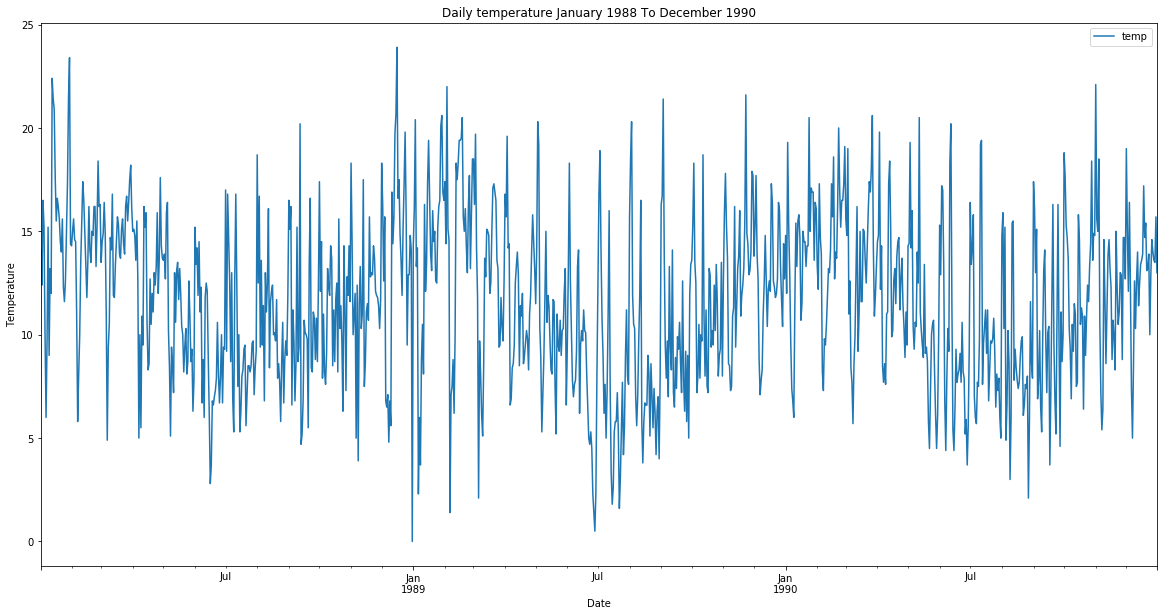

In [12]:
# Plots the training data
df_3years_fig = df_3years.plot(figsize=(20,10), title="Daily temperature January 1988 To December 1990")
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

## Using TimeSeriesForecasting package

In [2]:
# Creates the SARIMA_tsf object
tsf = SARIMA_tsf()

Displaying rolling plot...


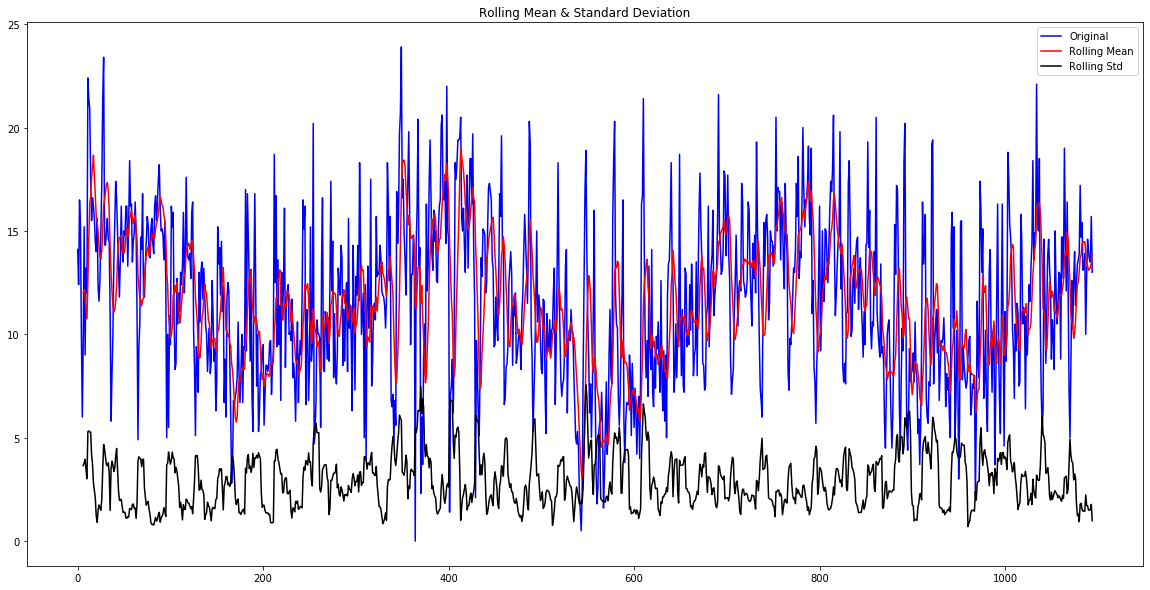

In [14]:
# Performs a 7 days rolling period on the temperature data
rolling_plot = tsf.display_rolling_plot(df_3years, 7)

In [15]:
# Performs the dickey fuller test to check if the data is stationary
dickey_test = tsf.dickey_fuller_test(df_3years)
dickey_test

Test Statistic                -7.126220e+00
p-value                        3.614497e-10
#Lags Used                     8.000000e+00
Number of Observations Used    1.086000e+03
Critical Value (1%)           -3.436386e+00
Critical Value (5%)           -2.864205e+00
Critical Value (10%)          -2.568189e+00
dtype: float64

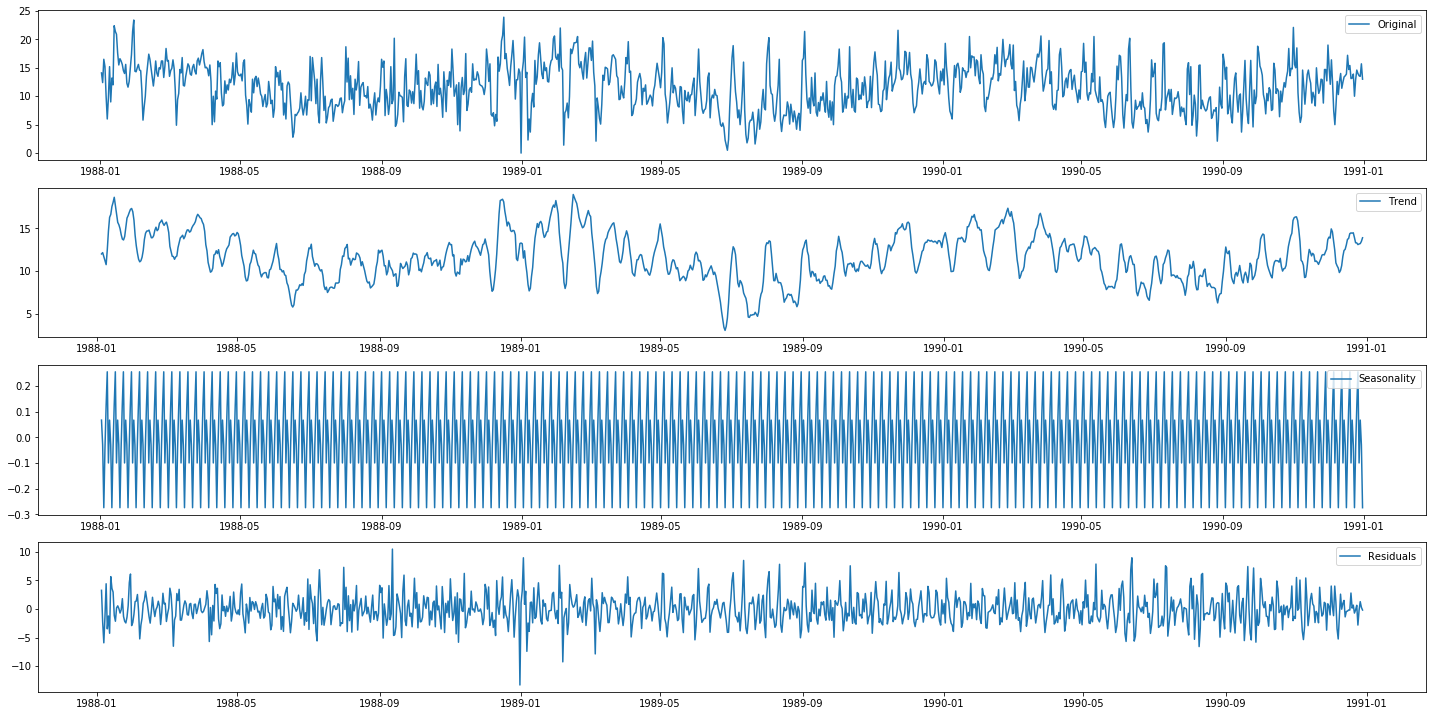

In [16]:
# Performs seasonal decomposition to separate the trend, seasonal and residual components of the time series
decompose, decom_fig = tsf.decompose(df_3years, 'additive')

## Two Methods

grid_search_CV -  if you want the models measured against MAPE (mean absolute percentage error)

grid_search_run - if you want the models measured against AIC (Akaike Information Criterion)

### Grid Search with Cross Validation



In [17]:
# Performs a GridSearch where the frequency of observations is monthly. We want to perform 12 
# validations where each forecast for 6 months
grid_cv_df = tsf.grid_search_CV(df_3years, range(0,2), [7, 14, 30], {'days': -14}, {'days': 7})

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

In [18]:
grid_cv_df

,order_param,seasonal_order_param,mape_total,mape_days
0,"(0, 0, 0)","(0, 0, 0, 7)",100.0,100.0
1,"(0, 0, 0)","(0, 0, 0, 14)",100.0,100.0
2,"(0, 0, 0)","(0, 0, 0, 30)",100.0,100.0
3,"(0, 0, 0)","(0, 0, 1, 7)",62.76,64.02
4,"(0, 0, 0)","(0, 0, 1, 14)",49.06,47.96
...,...,...,...,...
187,"(1, 1, 1)","(1, 1, 0, 14)",12.42,22.56
188,"(1, 1, 1)","(1, 1, 0, 30)",8.94,18.25
189,"(1, 1, 1)","(1, 1, 1, 7)",14.92,21.08
190,"(1, 1, 1)","(1, 1, 1, 14)",14.69,20.95


In [22]:
# Sorts the grid_cv_df by 'mape_months' and returns the top 5 mape
grid_cv_df.sort_values('mape_days', ascending=True).head(8)

,order_param,seasonal_order_param,mape_total,mape_days
0,"(0, 0, 0)","(0, 0, 0, 7)",100.0,100.0
1,"(0, 0, 0)","(0, 0, 0, 14)",100.0,100.0
2,"(0, 0, 0)","(0, 0, 0, 30)",100.0,100.0
92,"(0, 1, 1)","(1, 1, 0, 30)",13.19,17.78
44,"(0, 0, 1)","(1, 1, 0, 30)",12.29,18.01
20,"(0, 0, 0)","(1, 1, 0, 30)",12.27,18.18
188,"(1, 1, 1)","(1, 1, 0, 30)",8.94,18.25
11,"(0, 0, 0)","(0, 1, 1, 30)",13.54,18.49


### Grid Search Run

In [20]:
# Performs Grid Search and returns the AIC score of each
aic_scores = tsf.grid_search_run(df_3years, range(0,2), [7, 14, 30])

In [21]:
# This should only be ran if grid_search_run is used
# Performs cross validation for the top 5 AIC scores where the frequency of observations is daily. We want to perform 14 
# validations where each forecast for 7 days
model_run_validation = tsf.run_model_validation(aic_scores, df_3years, {'days': -14}, {'days': 7})
model_run_validation

,order_param,seasonal_order_param,mape_total,mape_days
0,"(1, 1, 1)","(1, 1, 1, 30)",13.79,20.84
1,"(1, 1, 1)","(0, 1, 1, 30)",14.42,21.45
2,"(1, 0, 1)","(1, 1, 1, 30)",13.54,19.95
3,"(1, 0, 0)","(1, 1, 1, 30)",13.89,20.28
4,"(1, 0, 1)","(0, 1, 1, 30)",16.86,23.01


### Forecasted Observation Values vs Actual Observation Values

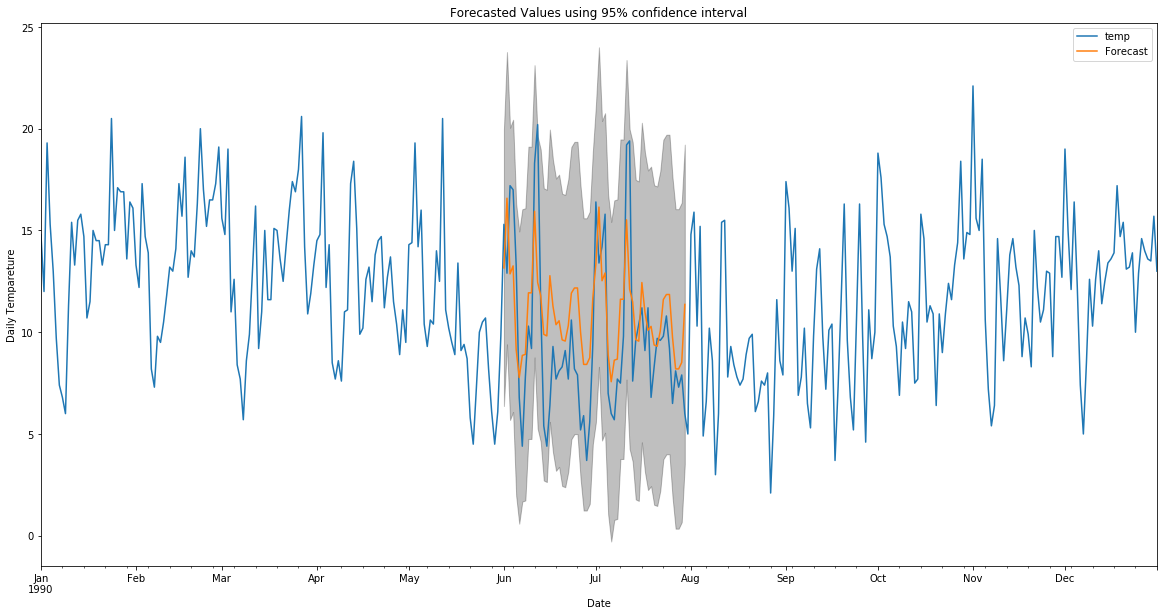

In [31]:
# Plots the forecasted observation values against the actual observation values, with a 95% confidence interval
forecast_res = tsf.plot_actuals_vs_forecast(df_3years, (0, 0, 1), (1, 0, 1, 30), 60, \
                        "Daily Tempareture", '1990-06-01', '1990-01-01', "Daily", 0.05)

## Final Model Build

In [32]:
# Builds the final model once you found the optimal set of parameters
final_model_build = tsf.model_build(df_3years, (0, 0, 1), (1, 0, 1, 30))

In [33]:
# Prints the summary table from the model
print("Summary Results Table.") 
print(final_model_build.summary().tables[1])

Summary Results Table.
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3612      0.026     13.857      0.000       0.310       0.412
ar.S.L30       0.9770      0.006    167.001      0.000       0.966       0.988
ma.S.L30      -0.5504      0.029    -19.275      0.000      -0.606      -0.494
sigma2        11.7575      0.446     26.372      0.000      10.884      12.631


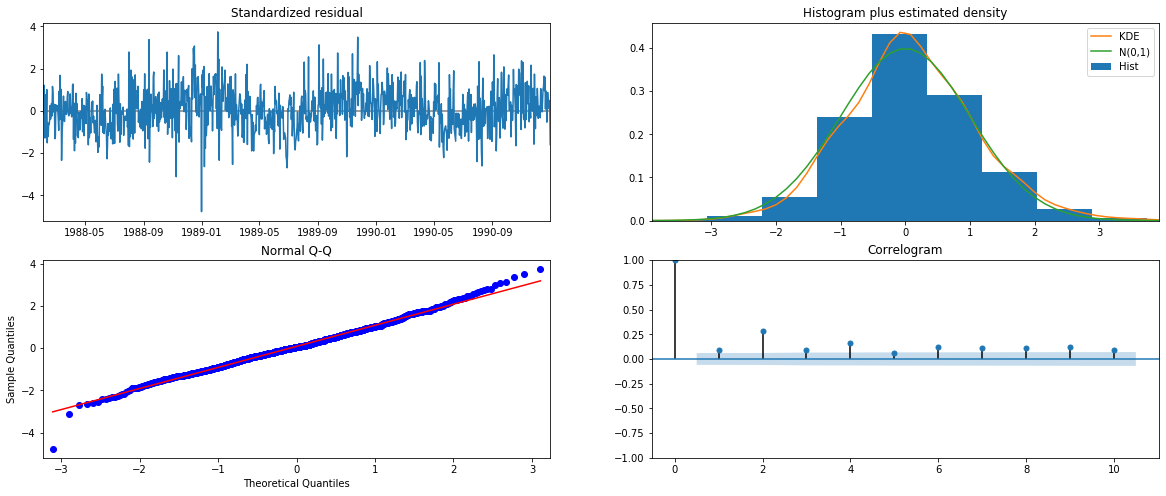

In [34]:
# Plots the model diagnostics
diag_fig = tsf.model_diagnostics(final_model_build)

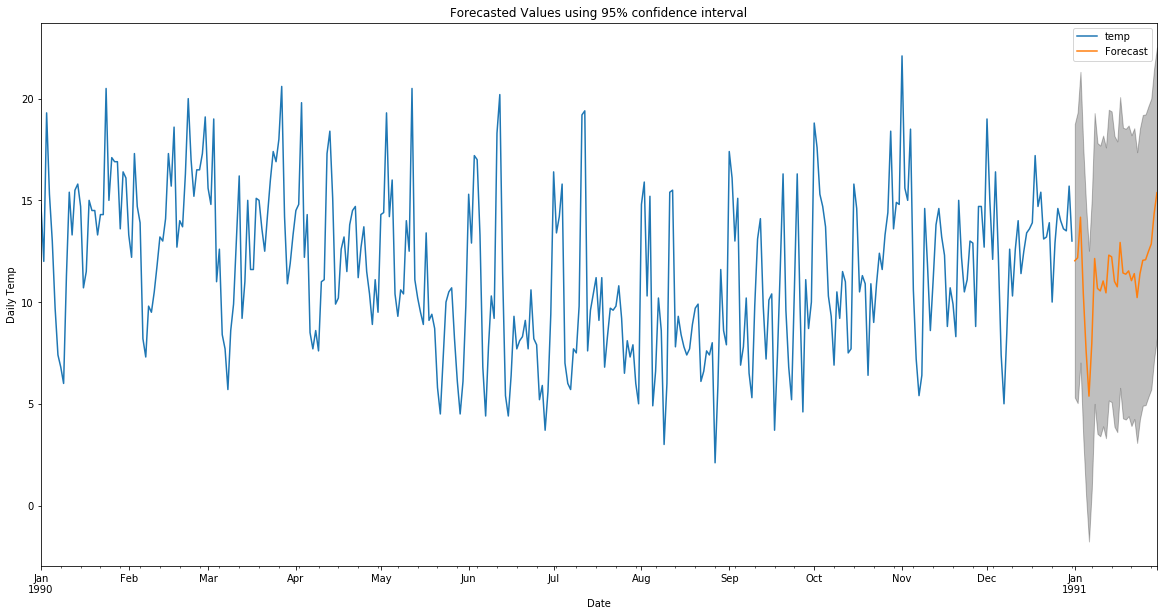

In [35]:
# Performs and plots the future forecasts
future_forecast_plot = tsf.plot_forecasts(final_model_build, 30, df_3years, "Daily Temp", '1990-01-01')